In [3]:
import warnings
warnings.filterwarnings("ignore")

import readPlotOptionSurface 
import modulesForCalibration as mfc

from scipy.optimize import fmin

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

#from mpl_toolkits.mplot3d import Axes3D
#from scipy import interpolate
#from scipy.stats import norm

In [4]:
# Parameters
alpha = 1.5
eta = 0.2
    
n = 12

# Model
model = 'Heston'

# risk free rate
r = 0.0245
# dividend rate
q = 0.005
# spot price
S0 = 190.3


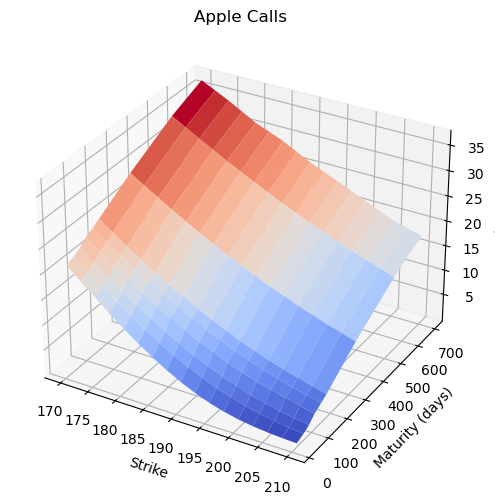

In [6]:
maturities, strikes, callPrices = readPlotOptionSurface.readNPlot()

marketPrices = callPrices
maturities_years = maturities/365.0

==========================================

  Nelder-Mead Simplex Algorithm -- fmin
  
==========================================

[ 2.3     0.046   0.0825 -0.53    0.054 ]

In [8]:
params = [2.3,     0.046,   0.0825, -0.53,    0.054]

def callbackF(xi):
    global num_iter
    global arg
    print('i = ' + str(num_iter))
    print('x_i = ' + str(xi))
    print('f_i = ' + str(mfc.eValue(xi, *arg)))
    num_iter += 1

arg = (marketPrices, maturities_years, strikes, r, q, S0, alpha, eta, n, model)

num_iter = 1
#xopt, fopt, iters, funcalls, warnflag, allvecs = fmin(
t = fmin(
        mfc.eValue, 
        params, 
        args=arg, 
        xtol=1e-4,
        ftol=1e-4,
        maxiter=20,
        maxfun=400,
        callback=callbackF,
        disp=True,
        retall=False,
        full_output=True)

print('optimal params = ')
print(t[0])
print('f = ' + str(t[1]))

i = 1
x_i = [ 2.369     0.04738   0.084975 -0.5459    0.0486  ]
f_i = 0.6687828051714552
i = 2
x_i = [ 2.4104    0.042228  0.08646  -0.55544   0.05076 ]
f_i = 0.5433962703792236
i = 3
x_i = [ 2.4104    0.042228  0.08646  -0.55544   0.05076 ]
f_i = 0.5433962703792236
i = 4
x_i = [ 2.4104    0.042228  0.08646  -0.55544   0.05076 ]
f_i = 0.5433962703792236
i = 5
x_i = [ 2.6462144   0.04318701  0.08419356 -0.57161984  0.04383936]
f_i = 0.3515829396426793
i = 6
x_i = [ 2.50829536  0.04299948  0.08980646 -0.5743945   0.04316198]
f_i = 0.3498782964477129
i = 7
x_i = [ 2.50829536  0.04299948  0.08980646 -0.5743945   0.04316198]
f_i = 0.3498782964477129
i = 8
x_i = [ 2.50829536  0.04299948  0.08980646 -0.5743945   0.04316198]
f_i = 0.3498782964477129
i = 9
x_i = [ 2.50829536  0.04299948  0.08980646 -0.5743945   0.04316198]
f_i = 0.3498782964477129
i = 10
x_i = [ 2.50829536  0.04299948  0.08980646 -0.5743945   0.04316198]
f_i = 0.3498782964477129
i = 11
x_i = [ 2.50829536  0.04299948  0.08980646

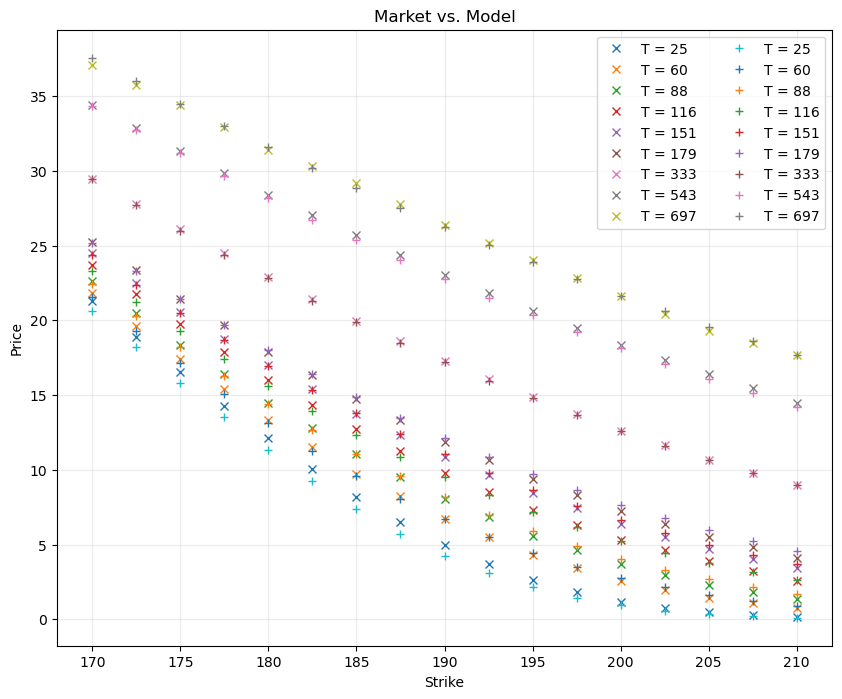

In [11]:
params2 = t[0]
lenT = len(maturities)
lenK = len(strikes)
modelPrices = np.zeros((lenT, lenK))

for i in range(lenT):
    for j in range(lenK):
        T = maturities_years[i]
        K = strikes[j]
        [km, cT_km] = mfc.genericFFT(params2, S0, K, r, q, T, alpha, eta, n, model)
        modelPrices[i,j] = cT_km[0]


# plot
fig = plt.figure(figsize=(10,8))
labels = []
colormap = cm.Spectral
#plt.gca().set_color_cycle([colormap(i) for i in np.linspace(0, 0.9, len(maturities))])
for i in range(len(maturities)):
    plt.plot(strikes, callPrices[i,:], 'x')
    labels.append('T = ' + str(maturities[i]))
    
for i in range(len(maturities)):
    plt.plot(strikes, modelPrices[i,:], '+')
    labels.append('T = ' + str(maturities[i]))
plt.legend(labels, loc='upper right', ncol=2)
plt.grid(alpha=0.25)
plt.xlabel('Strike')
plt.ylabel('Price')
plt.title('Market vs. Model')
#plt.savefig('MarketvsModel_NelderMead.png')
plt.show() 
